import library yang digunakan

In [1]:
# import os
# import gdown
# import zipfile
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bike Sharing Dataset

mengektrak dataset dari google drive

In [2]:
# localzip = '/tmp/bike-sharing-dataset.zip'
# gdown.download(output=localzip, id='1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ')
# with zipfile.ZipFile(localzip) as zip:
#   zip.extractall('/content')

In [2]:
day_df = pd.read_csv('day.csv')
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845
189,190,2011-07-09,3,0,7,0,6,0,1,0.733333,0.664158,0.609167,0.167912,1988,3348,5336
436,437,2012-03-12,1,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,838,4460,5298
127,128,2011-05-08,2,0,5,0,0,0,1,0.528333,0.518933,0.631667,0.074637,1401,2932,4333
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2088,2089,2011-04-01,2,0,4,21,0,5,1,1,0.32,0.3333,0.53,0.1343,9,84,93
11880,11881,2012-05-15,2,1,5,5,0,2,1,3,0.56,0.5303,0.94,0.2239,0,8,8
13712,13713,2012-07-30,3,1,7,13,0,1,1,1,0.80,0.7424,0.49,0.1642,57,169,226
14948,14949,2012-09-20,3,1,9,1,0,4,1,1,0.46,0.4545,0.72,0.1045,4,14,18
9021,9022,2012-01-16,1,1,1,18,1,1,0,1,0.26,0.2273,0.52,0.3284,6,175,181


membuka file `Readme.txt` guna mengetahui deskripsi setiap kolom

In [5]:
# ! cat Readme.txt

### Dataset backgroud :

>Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

>Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

---
### Dataset characteristics

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Problem Statement

Berdasarkan deskripsi latar belakang dari dataset Bike-Sharing ini, berikut merupakan pertanyaan analisis yang akan saya gunakan sebagai acuan

> Bagaimana pola permintaan dari penggunaan sepeda ? kapan saat permintaan relatif tinggi dan kapan saat permintaan relatif rendah

> Apa faktor utama yang mengakibatkan naik turunnya permintaan ?


## Data Wrangling

mengecek info masing-masing df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan info diatas , kita dapat mengetahui bahwa tidak terdapat kolom dengan missing value. Untuk kolom tanggal yaitu `dteday` akan saya biarkan dalam bentuk string terlebih dahulu. Selanjutnya kita akan mengecek apakah ada data yang terduplikasi.

In [8]:
day_df.duplicated().sum()

0

In [9]:
hour_df.duplicated().sum()

0

Terlihat bahwa tidak ada baris yang terduplikasi, selanjutnnya kita akan melihat apakah ada data yang tidak akurat.

In [10]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan informasi di atas kita dapat melihat bahwa:
- `season` memiliki rentang nilai 1 sampai 4, sesuai dengan jumlah musim dalam setahun
- `yr` memiliki nilai 0 atau 1
- `mnth` memiliki rentang nilai 1-12, sesuai dengan jumlah bulan dalam setahun
- `holiday` memiliki nilai 0 atau 1
- `weekday` memiliki rentang nilai 0-6, sesuai dengan jumlah hari dalam seminggu
- `workingday` memiliki nilai 0 atau 1
- `weathersit` memiliki nilai antara 1-4 ,sesuai deskripsi dari file Readme
- `temp` memiliki rentang nilai 0 - 1
- `atemp` memiliki rentang nilai 0 - 1
- `hum` memiliki rentang nilai 0 - 1
- `windspeed` memiliki rentang nilai 0 - 1

Jadi, semua kolom yg saya sebutkan sudah terisi dengan benar (tidak terdapat data yang tidak akurat). Sesuai dengan deskripsi yang diberikan di file Readme.

Namun pada `hour_df` terdapat kejanggalan, karena seharusnya nilai `mean` pada kolom `hr` atau jam pas 11.5 (hanya ada angka 5 dibelakang koma).

In [12]:
np.arange(24).mean()

11.5

In [71]:
by_date_instat = hour_df.groupby(by="dteday").agg({'instant':'count'}).reset_index()
by_date_instat[by_date_instat['instant'] < 24].sort_values('instant')

,dteday,instant
667,2012-10-29,1
26,2011-01-27,8
668,2012-10-30,11
17,2011-01-18,12
25,2011-01-26,16
...,...,...
723,2012-12-24,23
69,2011-03-11,23
71,2011-03-13,23
34,2011-02-04,23


ohh tidak... rupanya data pada `hour_df` ada yang tidak lengkap untuk 24 jam pada beberapa tanggal. Untuk mengatasi hal ini pertama saya akan menggabungkan kolom `dteday` dan `hr` menjadi kolom `datetime`

In [28]:
hour_df['datetime'] = pd.to_datetime(hour_df.dteday) + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [29]:
# menambahkan baris-baris yang missing
min_datetime = hour_df.datetime.min()
max_datetime = hour_df.datetime.max()
all_datetime = pd.date_range(min_datetime, max_datetime, freq='H')
datetime_df = pd.DataFrame({'datetime':all_datetime})
new_hour_df = pd.merge(datetime_df, hour_df, on='datetime', how='left')
new_hour_df.sort_index(inplace=True)
# mengatasi null pada kolom yang berkaitan dengan waktu
fill_hr = lambda row: row['datetime'].hour if pd.isnull(row['hr']) else row['hr']
fill_dteday = lambda row: row['datetime'].strftime('%Y-%m-%d') if pd.isnull(row['dteday']) else row['dteday']
fill_month = lambda row: row['datetime'].month if pd.isnull(row['mnth']) else row['mnth']
fill_yr = lambda row: row['datetime'].year if pd.isnull(row['yr']) else row['yr']
new_hour_df.hr = new_hour_df.apply(fill_hr, axis=1)
new_hour_df.dteday = new_hour_df.apply(fill_dteday, axis=1)
new_hour_df.mnth = new_hour_df.apply(fill_month, axis=1)
new_hour_df.yr = new_hour_df.apply(fill_yr, axis=1)

new_hour_df.set_index('datetime',inplace=True)

selanjutnya mengatasi null value pada kolom yang berkaitan pada hari tersebut

In [30]:
new_hour_df.season.interpolate('pad', inplace=True)
new_hour_df.holiday.interpolate('pad', inplace=True)
new_hour_df.weekday.interpolate('pad', inplace=True)
new_hour_df.workingday.interpolate('pad', inplace=True)
new_hour_df.weathersit.interpolate('pad', inplace=True)

mengiatasi null value pada sisa kolom kecuali 'instant'

In [31]:
new_hour_df.temp.interpolate('time', direction='forward', inplace=True)
new_hour_df.atemp.interpolate('time', direction='forward', inplace=True)
new_hour_df.hum.interpolate('time', direction='forward', inplace=True)
new_hour_df.windspeed.interpolate('time', direction='forward', inplace=True)
new_hour_df.casual.interpolate('time', direction='forward', inplace=True)
new_hour_df.registered.interpolate('time', direction='forward', inplace=True)
new_hour_df.cnt.interpolate('time', direction='forward', inplace=True)

In [32]:
new_hour_df.isna().sum()

instant       165
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [33]:
new_hour_df.reset_index(inplace=True)
new_hour_df.drop('datetime', axis=1, inplace=True)
new_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,8690.0000,2.496580,19.413988,6.519836,11.500000,0.029754,2.996979,0.682969,1.434223,0.495044,0.473957,0.628428,0.190965,35.358556,152.527930,187.886485
std,5017.0295,1.110079,194.092404,3.449649,6.922384,0.169912,2.004567,0.465333,0.648339,0.193192,0.172519,0.193041,0.122900,49.181593,151.218524,181.278201
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,5.750000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,38.000000
50%,8690.0000,3.000000,1.000000,7.000000,11.500000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,114.000000,140.000000
75%,13034.5000,3.000000,1.000000,10.000000,17.250000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,48.000000,219.000000,279.000000
max,17379.0000,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Explorasi data

Pertama saya ingin mengetahui korelasi antara setiap parameter dengan banyaknya pengguna sepeda pada suatu hari

In [12]:
parameters = ["mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"]
day_df.loc[:,parameters].corrwith(day_df.cnt)

mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
dtype: float64

Berdasarkan informasi di atas, kita dapat mengetahui beberapa hal
* Suhu, `temp & atemp` memiliki korelasi positif yang tinggi.Ini berarti para pengguna cenderung bersepeda saat suhu di luar sedang hangat.
* Bulan atau `mnth` memilik korelasi positif tetapi tidak terlalu signifikat.
* Agak diluar dugaan bahwa hari tidak memiliki korelasi signifikat terhadap jumlah pengguna sepeda, `holiday, weekday, workingday` memiliki korelasi mendekati 0.
* `weathersit, hum , windspeed` memiliki korelasi negatif yang tidak terlalu signifikat.

Tetapi ini adalah hasil korelasi terhadap `cnt` yang mana merupakan gabungan antara dua tipe pengguna. Selanjutnya saya akan melihat korelasi setiap parameter terhadap kedua tipe pengguna.

In [13]:
day_df.loc[:,parameters].corrwith(day_df.casual)

mnth          0.123006
holiday       0.054274
weekday       0.059923
workingday   -0.518044
weathersit   -0.247353
temp          0.543285
atemp         0.543864
hum          -0.077008
windspeed    -0.167613
dtype: float64

Berdasarkan informasi diatas ,kita dapat mengetahui beberapa hal
* Suhu masih tetap menjadi faktor penting bagi pengguna kasual
* `workingday` atau hari kerja memiliki korelasi negatif yang signifikat. Ini berarti para pengguna kasual lebih menyukai bersepeda disaat weekend atau hari libur. Tetapi anehnya `holiday` tidak memiliki korelasi yang signifikat, apakah pengguna kasual lebih cenderung bersepeda di hari weekend ?
* parameter `weathersit, hum , windspeed` masih memiliki korelasi yang kurang signifikat

untuk menjawab pertanyaan tersebut saya akan memodifikasi kolom `weekday` dengan membuat standar hari mulai dari hari senin = 1 - minggu = 7.

In [14]:
day_df.weekday.mask(day_df.weekday==0,7, inplace=True)
day_df.loc[:,parameters].corrwith(day_df.casual)

mnth          0.123006
holiday       0.054274
weekday       0.418415
workingday   -0.518044
weathersit   -0.247353
temp          0.543285
atemp         0.543864
hum          -0.077008
windspeed    -0.167613
dtype: float64

dan benar, weekday memiliki korelasi positif yang cukup signifikat.

selanjutnya kita akan melihat korelasi masing-masing parameter terhadap pengguna tipe "registered"

In [15]:
day_df.loc[:,parameters].corrwith(day_df.registered)

mnth          0.293488
holiday      -0.108745
weekday      -0.189080
workingday    0.303907
weathersit   -0.260388
temp          0.540012
atemp         0.544192
hum          -0.091089
windspeed    -0.217449
dtype: float64

Berdasarkan informasi diatas ,kita dapat mengetahui beberapa hal. Suhu tentunya masih merupakan faktor penting bagi pengguna tipe "registered". Tapi terdapat sedikit perbedaan terhadap pengguna kasual, pengguna tipe "registered" cenderung lebih sering menggunakan sepeda pada hari kerja. Mungkin karena pengguna tipe ini menggunakan sepeda untuk sarana transportasi mereka saat bekerja ? kita tidak dapat mengetahui pastinya.

selanjutnya saya ingin melihat di jam-jam berapa pengguna cenderung bersepeda

In [16]:
hour_df.groupby(by='hr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values('cnt',ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Mungkin akan lebih baik jika saya membegi waktu menjadi beberapa bagian. Saya akan menggunakan gambar ini sebagai referensi, tetapi menggabungkan 'petang' dengan 'sore'

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhZBn-P_BATZJ54Le2A_1eQ_7jQ2O2RSlsXAAqpKmIbnLFVnohdEeaFXMPGpo-C_iSGdAAGdrT4HpdqGOoG_q8ZO7ciujat2YIS4cRRim1XIn35qHbPmWJ-EugA_fYut1iR7ilFljfTcZCZomrwcwhGl750dNROkWeK1w8bBiOIOQGGGM5f8zKUa9Mm/s904/soal%20pembagian%20waktu%20pagi%20siang%20sore%20petang%20malam.png">

In [17]:
def kelompokwaktu(hr):
  if hr in [0,1,2,19,20,21,22,23]:
    return "malam"
  if hr in [3,4,5,6,7,8,9]:
    return 'pagi'
  if hr in [10,11,12,13,14]:
    return 'siang'
  if hr in [15,16,17,18]:
    return 'sore'

hour_df['hr_group'] = hour_df.hr.apply(kelompokwaktu)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,pagi
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,pagi


In [18]:
hour_df.groupby(by='hr_group').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values('cnt',ascending=False)

,casual,registered,cnt
hr_group,,,
sore,207156,850373,1057529
siang,234595,587967,822562
malam,125214,630769,755983
pagi,53052,603553,656605


berdasarkan informasi diatas dapat dilihat bahwa secara keseluruhan pengguna sepeda lebih cenderung menggunakan sepeda di sore hari

## Visualisasi data

### Bagaimana statistik pengguna per hari?

In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [20]:
def plot_per_hours(day):
  one_day = hour_df.loc[hour_df.dteday == day].copy()
  # normalisasi
  one_day.casual = (one_day.casual - one_day.casual.mean()) / one_day.casual.std()
  one_day.registered = (one_day.registered - one_day.registered.mean()) / one_day.registered.std()

  plt.figure(figsize=(12, 5))
  plt.plot(one_day['hr'], one_day['casual'], color='#66ff66')
  plt.plot(one_day['hr'], one_day['registered'], color='#ff6666')
  plt.title(f'user stats on {day.date()}')
  plt.xticks(one_day['hr'])
  plt.yticks([])
  plt.xlabel('hour',size=15)
  plt.ylabel("Stats")
  plt.legend(['casual user','registered user'])
  plt.show()

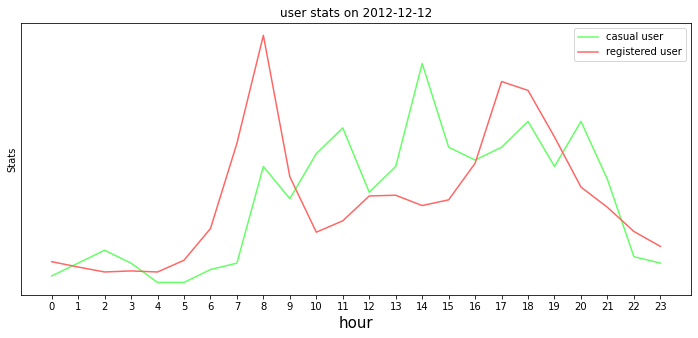

In [21]:
plot_per_hours(datetime.datetime(2012,12,12))

### Saat jam-jam berapa user lebih sering menggunakan sepeda ?

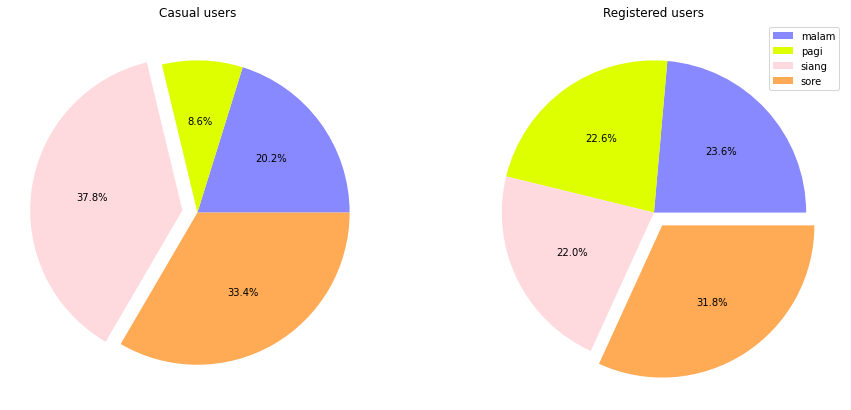

In [22]:
by_hr_group =  hour_df.groupby(by='hr_group').agg({
                    'casual':'sum',
                    'registered':'sum',
                }).reset_index()

fig = plt.gcf()
fig.set_size_inches(15,15)
colors = ('#8888ff', '#ddff00', '#fedadf', '#ffaa55')

plt.subplot(1,2,1)
plt.title('Casual users')
plt.pie(
    x=by_hr_group.casual,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0, 0, 0.1, 0)
)

plt.subplot(1,2,2)
plt.title('Registered users')
plt.pie(
    x=by_hr_group.registered,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0, 0, 0, 0.1)
)
plt.legend(by_hr_group.hr_group)
plt.show()

### Bagaimana perbandingan preferensi setiap user dalam hari bersepeda ?

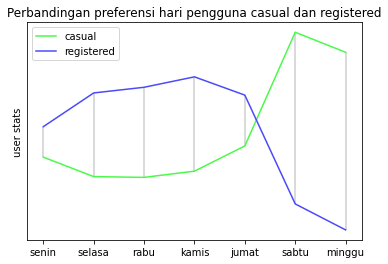

In [23]:
by_weekday =  day_df.groupby(by='weekday').agg({
                    'casual':'sum',
                    'registered':'sum',
                }).reset_index()

X = ['senin','selasa','rabu','kamis','jumat','sabtu','minggu']
X_axis = by_weekday.weekday

by_weekday.casual = (by_weekday.casual - by_weekday.casual.mean()) / by_weekday.casual.std()
by_weekday.registered = (by_weekday.registered - by_weekday.registered.mean()) / by_weekday.registered.std()

plt.bar(X_axis, by_weekday.casual, 0.04, color='#dadada')
plt.bar(X_axis, by_weekday.registered, 0.04, color='#dadada')

plt.plot(X_axis, by_weekday.casual, label = 'casual', color='#4afa4a')
plt.plot(X_axis, by_weekday.registered, label = 'registered', color='#4a4afa')

plt.xticks(X_axis, X)
plt.yticks([])
plt.xlabel(None)
plt.ylabel("user stats")
plt.title("Perbandingan preferensi hari pengguna casual dan registered")
plt.legend()
plt.show()

### Parameter apa yang paling berpengaruh ?

In [24]:
def get_corr(_with):
  corr_index = ["month","holiday","weekday","working day","weather","temperature","feeling temperature","humidity","windspeed",]
  corr = day_df.loc[:,parameters].corrwith(_with)
  corr.index = corr_index
  corr = corr.abs().reset_index().rename({0:'corr'}, axis=1)
  return corr

In [25]:
def corr_barplot(_with, title="all user count"):
  corr = get_corr(_with)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

  colors1 = [ "#FDBB44","#FDBB44","#FDAA88", "#FDAA88","#D3D3D3"]
  colors2 = [ "#FB4444","#FB4444","#D3D3D3", "#D3D3D3","#D3D3D3"]

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=False).head(), palette=colors1, ax=ax[0])
  ax[0].set_ylabel(None)
  ax[0].set_xlabel(None)
  ax[0].set_title("Most Correlation", loc="center", fontsize=15)
  ax[0].tick_params(axis ='y', labelsize=12)

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=True) .head(), palette=colors2, ax=ax[1])
  ax[1].set_ylabel(None)
  ax[1].set_xlabel(None)
  ax[1].invert_xaxis()
  ax[1].yaxis.set_label_position("right")
  ax[1].yaxis.tick_right()
  ax[1].set_title("Least Correlation", loc="center", fontsize=15)
  ax[1].tick_params(axis='y', labelsize=12)

  plt.suptitle(f"Most and Least correlation with {title} ", fontsize=20)
  plt.show()

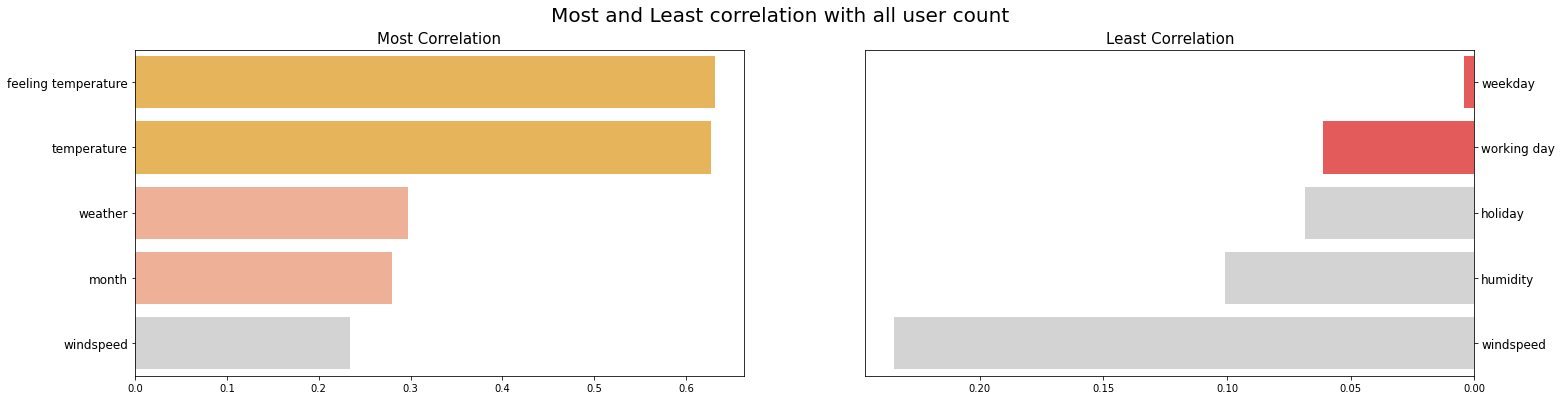

In [26]:
corr_barplot(day_df.cnt,"all user count")

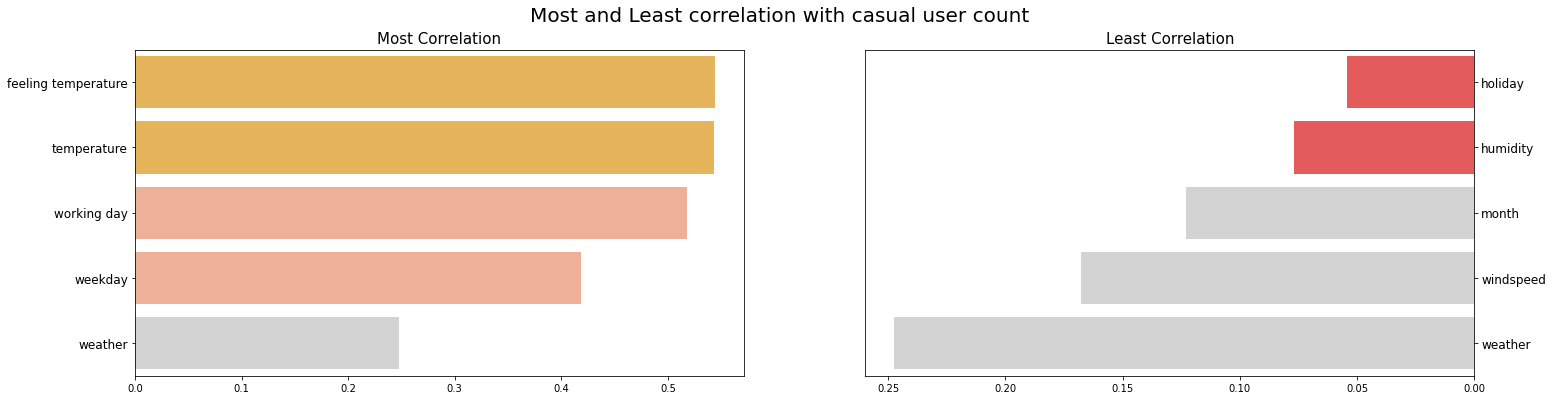

In [27]:
corr_barplot(day_df.casual,"casual user count")

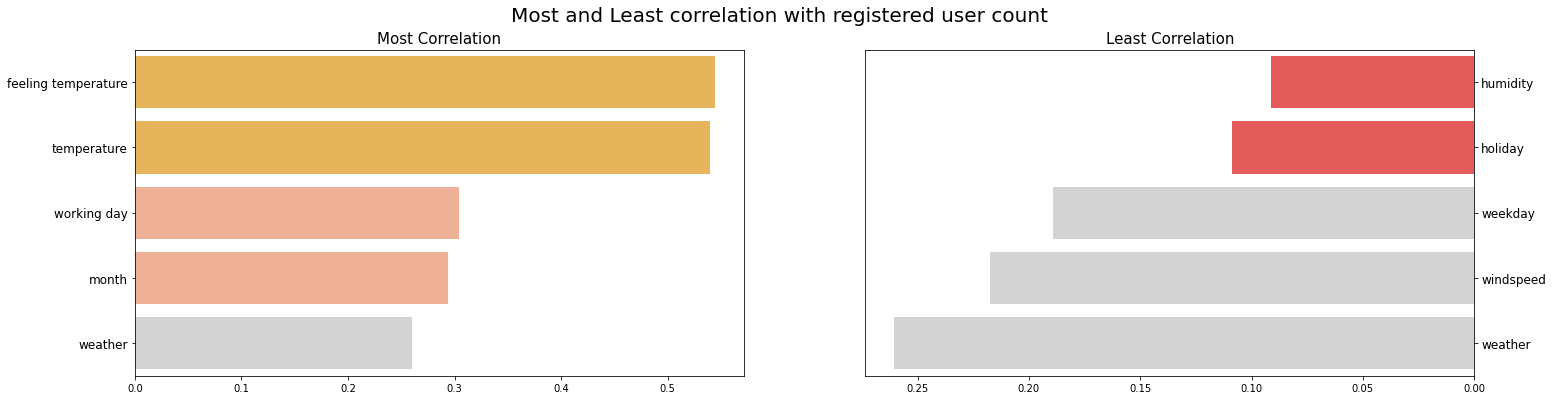

In [28]:
corr_barplot(day_df.registered,"registered user count")

## Kesimpulan

Dataset Bike Sharing adalah dataset yang *well-maintaned* sehingga saya tidak perlu melakukan proses data cleaning yg intensif. Pengguna dari sitem informasi "Bike Sharing" terbagi menjadi dua yaitu casual user dan registered user. Terdapat perbedaan yang signifikat antara sifat dari kedua tipe user ini. Pengguna tipe *casual* lebih sering bersepeda saat bukan hari kerja dan cenderung pada siang hari. Sedangkan pengguna tipe registered lebih sering bersepeda di hari kerja dan cenderung bersepeda pada sore hari. Namun kedua tipe user juga memiliki sifat yang sama yaitu bersepeda saat suhu udara terasa hangat.